### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [ ]:
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-PoonamPathaknpc.git

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as mp
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
userdf = pd.read_csv('user.csv') 
print(userdf.head())
itemdf = pd.read_csv('item.csv')
print(itemdf.head())
datadf = pd.read_csv('Data.csv')
print(datadf.head())

   user id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213
   movie id  movie title release date  unknown  Action  Adventure  Animation  \
0         1   Toy Story   01-Jan-1995        0       0          0          1   
1         2   GoldenEye   01-Jan-1995        0       1          1          0   
2         3  Four Rooms   01-Jan-1995        0       0          0          0   
3         4  Get Shorty   01-Jan-1995        0       1          0          0   
4         5     Copycat   01-Jan-1995        0       0          0          0   

   Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  Musical  \
0          1       1      0  ...        0          0       0        0   
1          0       0      0  ...        0          0       0        0   
2          0       0      0  ...    

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [4]:
print('User data')
print('**********************************')
print(userdf.info())
print('**********************************')
print(userdf.describe())
print('**********************************')
print(userdf.shape)
print('**********************************')
print(userdf.isnull().sum())
print('**********************************')
print('Item data')
print('**********************************')
print(itemdf.info())
print('**********************************')
print(itemdf.describe())
print('**********************************')
print(itemdf.shape)
print('**********************************')
print(itemdf.isnull().sum())
print('**********************************')
print('Data data')
print('**********************************')
print(datadf.info())
print('**********************************')
print(datadf.describe())
print('**********************************')
print(datadf.shape)
print('**********************************')
print(datadf.isnull().sum())
print('**********************************')

User data
**********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
**********************************
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
**********************************
(943, 5)
**********************************
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64
**********************************
Ite

#### 4. Find the number of movies per genre using the item data - 5 marks

In [5]:
# use sum on the default axis

#output file :q4_ans.csv
df = itemdf.drop('movie id' , axis=1)
df = df.drop('movie title' , axis=1)
df = df.drop('release date' , axis=1)
print(df.sum())
df.sum().to_csv('q4_ans.csv',index=True)


unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


#### 5. Find the movies that have more than one genre - 2.5 marks

In [6]:
#hint: use sum on the axis = 1

#output file :q5_ans.csv
tdf = pd.DataFrame({"NumofCategories":df.sum(axis=1)})
mdf = pd.concat([itemdf,tdf],axis=1,sort=False)
print(mdf.query('NumofCategories > 1')['movie title'])
mdf.query('NumofCategories > 1')['movie title'].to_csv('q5_ans.csv',index=True)






0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [7]:
#output file :q6_ans.csv
unknown_id = itemdf.drop(itemdf.query('unknown == 1')['movie id'])
unknown_id.to_csv('q6_ans.csv',index=True)


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

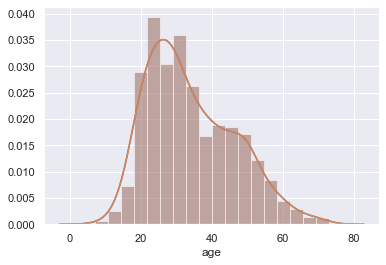

In [8]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# distplot for age
sns.distplot(userdf['age'])
fig = sns.distplot(userdf['age']).get_figure()
fig.savefig("q7_ans_age.png")

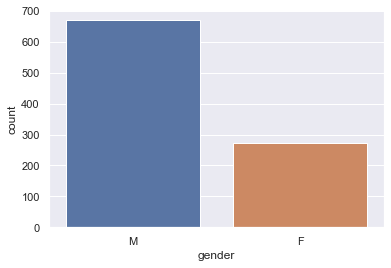

In [9]:
# countplot for gender
sns.countplot(userdf['gender'])
fig = sns.countplot(userdf['gender']).get_figure()
fig.savefig("q7_ans_gender.png")

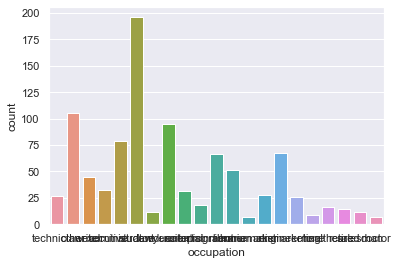

In [10]:
# countplot for occupation
sns.countplot(userdf['occupation'])
fig = sns.countplot(userdf['occupation']).get_figure()
fig.savefig("q7_ans_occupation.png")

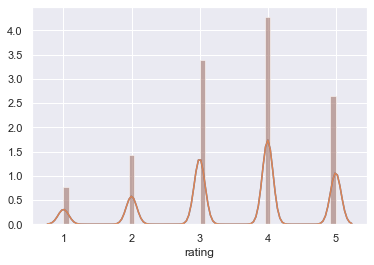

In [11]:
# distplot for rating
sns.distplot(datadf['rating'])
fig = sns.distplot(datadf['rating']).get_figure()
fig.savefig("q7_ans_rating.png")

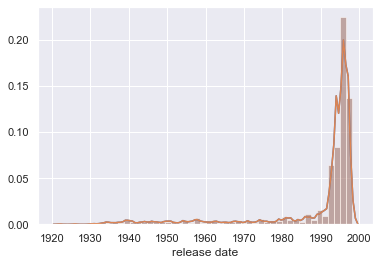

In [19]:
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.
#similarly, the release year needs to be taken out from release date

#function to fetch year from release date
def get_year(s):
    return s.split('-')[2]

#distplot for release year
sns.distplot(itemdf['release date'].apply(get_year))

fig = sns.distplot(itemdf['release date'].apply(get_year)).get_figure()
fig.savefig("q7_ans_release_date.png")



### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [28]:
# creating the data frame to track genre in column and release year in index
itemdf.head()
tdf = pd.DataFrame({"release year":itemdf['release date'].apply(get_year)})
mdf = pd.concat([itemdf,tdf],axis=1,sort=False)
df = mdf.groupby('release year').sum().drop('movie id' , axis=1)


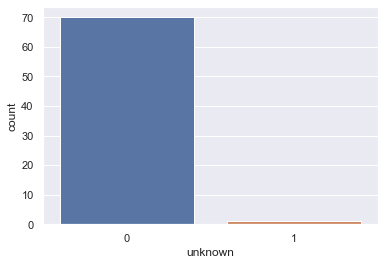

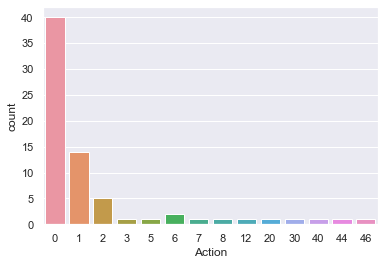

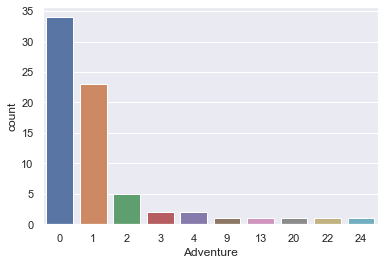

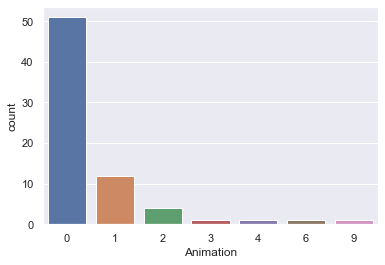

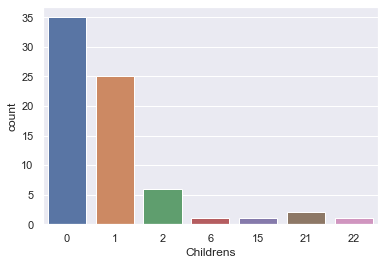

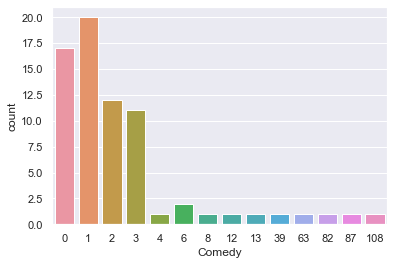

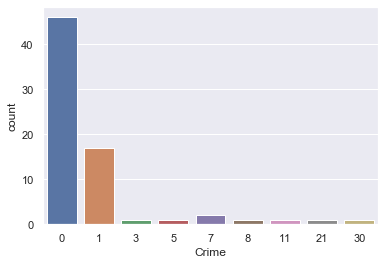

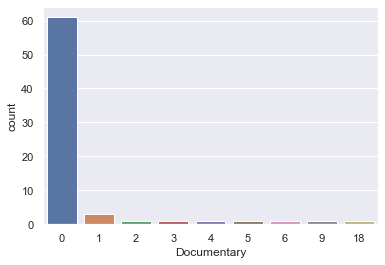

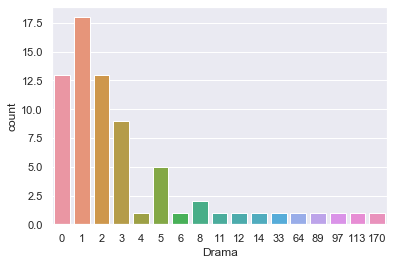

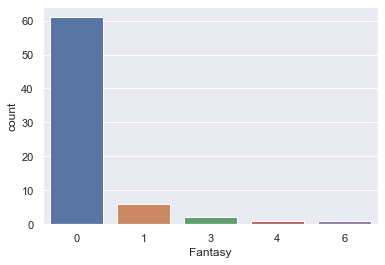

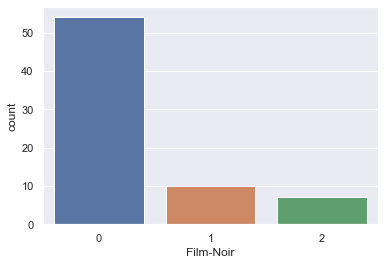

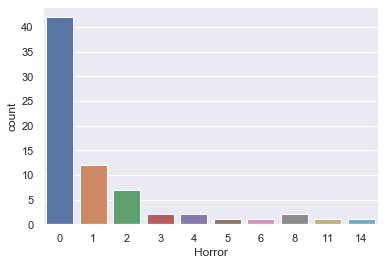

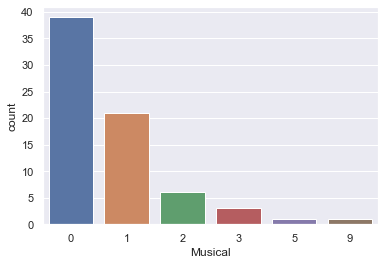

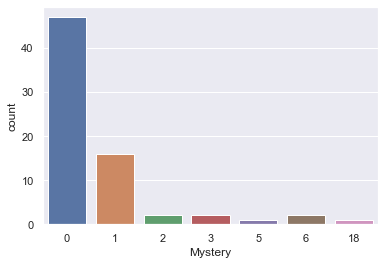

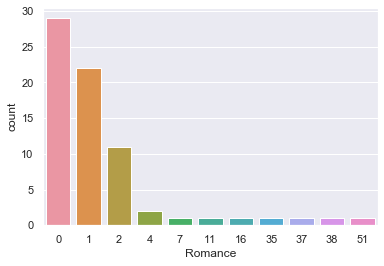

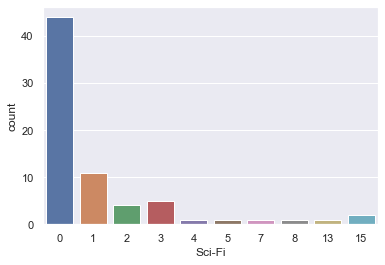

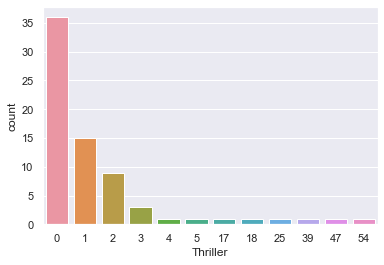

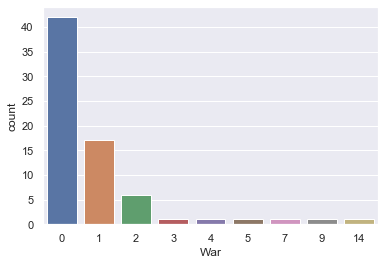

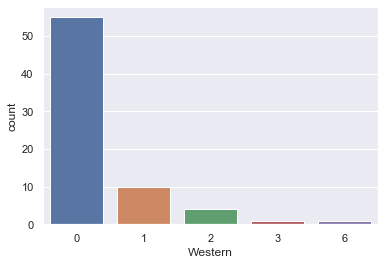

In [27]:
   
#  SUBPLOTS made through for loop for each Genre
for i, col in enumerate(df.columns):
    mp.figure(i)
    fig = sns.countplot(x=col, data=df)
    fig.figure.savefig("q8_ans_" + col + ".png")

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [35]:
#Finding the average rating of all the movies and sort them in the descending order

tdf1 = pd.DataFrame({'total_rating':datadf.groupby('movie id').sum()['rating'],
                     'rating avg':datadf.groupby('movie id').mean()['rating']})

tdf2 = tdf1.sort_values(by = 'rating avg' , ascending = False)


#getting top 25  movies with average ratings by filtering the set with movies that have more than 100 ratings
df = pd.merge(tdf2,itemdf,how='outer',on='movie id').query('total_rating > 100').head(25)

# display only the movie titles

df['movie title'].to_csv('q9_ans.csv',index=True)

df['movie title']



15                                      Close Shave, A 
16                                    Schindler's List 
17                                 Wrong Trousers, The 
18                                          Casablanca 
19     Wallace & Gromit: The Best of Aardman Animation 
20                           Shawshank Redemption, The 
21                                         Rear Window 
22                                 Usual Suspects, The 
23                                           Star Wars 
24                                        12 Angry Men 
25                                      Third Man, The 
28                                        Citizen Kane 
29                    Some Folks Call It a Sling Blade 
30                               To Kill a Mockingbird 
31                     One Flew Over the Cuckoo's Nest 
32                           Silence of the Lambs, The 
33                                  North by Northwest 
34                                      Godfathe

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [39]:

df = pd.merge(userdf,datadf,how='outer',on='user id')
df = pd.merge(itemdf,df,on='movie id')

# encode gender column with male - '0' and female - '1'
df_dummies= pd.get_dummies(df, prefix='gender', columns=['gender'])

tdf  = pd.DataFrame({'gender':df_dummies['gender_F'],
                     'total_count':df_dummies.groupby('gender_F')['gender_F'].transform('count')}).drop_duplicates()

In [43]:
#Men watch more drama than women?

# data related to Drama
ddf = df_dummies.query('Drama == 1')
ddf1 = pd.DataFrame({'gender':ddf['gender_F'],
                     'drama_count':ddf.groupby('gender_F')['gender_F'].transform('count')}).drop_duplicates()

perc_df = pd.merge(tdf,ddf1,on='gender')


perc_df['% of Rating'] = (perc_df['drama_count']/perc_df['total_count'])*100
perc_df

#Assumption: Rating has a direct relationship with viewing .
#If women rating are more on drama then it can be inferred that they watch more dram
# Observation from below data:
# - 38.9% of Men ratings are for Drama
# - 42.7% of Women ratings are for Drama

#Conclusion: The statement that 'Men watch more drama than women' is not valid from the given data.

,gender,total_count,drama_count,% of Rating
0,0,74253,28887,38.903479
1,1,25738,11008,42.769446


In [42]:
# Men watch more Romance than women
# data related to Romance
rdf = df_dummies.query('Romance == 1')
ddf2 = pd.DataFrame({'gender':rdf['gender_F'],
                     'romance_count':rdf.groupby('gender_F')['gender_F'].transform('count')}).drop_duplicates()

perc_df = pd.merge(tdf,ddf2,on='gender')
perc_df['% of Rating'] = (perc_df['romance_count']/perc_df['total_count'])*100
perc_df

# Observation from below data:
# - 18.3% of Men ratings are for Romance
# - 22.7% of Women ratings are for Romance

#Conclusion:The statement that 'Men watch more Romance than women' is not valid from the given data.


,gender,total_count,romance_count,% of Rating
0,0,74253,13603,18.319799
1,1,25738,5858,22.760121


In [41]:
#Women watch more Sci-Fi than men

# data related to SciFi
sdf = df_dummies.rename(columns = {'Sci-Fi':'SciFi'}).query('SciFi == 1')
ddf3 = pd.DataFrame({'gender':sdf['gender_F'],
                     'scifi_count':sdf.groupby('gender_F')['gender_F'].transform('count')}).drop_duplicates()

perc_df = pd.merge(tdf,ddf3,on='gender')
perc_df['% of Rating'] = (perc_df['scifi_count']/perc_df['total_count'])*100
perc_df


# Observation from below data:
# - 13.6% of Men ratings are for SciFi
# - 10.2% of Women ratings are for SciFi

#Conclusion: The statement that 'Women watch more Sci-Fi than men' is not valid from the given data.

,gender,total_count,scifi_count,% of Rating
0,0,74253,10101,13.603491
1,1,25738,2629,10.214469
